<a href="https://colab.research.google.com/github/khwan8/projects/blob/main/Migraine_Prediction/Migraine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn. neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.backend import clear_session
from sklearn import model_selection
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from imblearn.over_sampling import SMOTE
from numpy import where
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
# tuning parameter
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
# train machine learning classification model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
# metrics
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,explained_variance_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

# skip warning
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings( action= 'ignore')

# New Section

In [ ]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

#import dataset
diary = pd.read_csv("/content/drive/MyDrive/00 Study folder/03_Dissertation/Data/Diary.csv")
patient = pd.read_csv("/content/drive/MyDrive/00 Study folder/03_Dissertation/Data/Patient.csv")


Mounted at /content/drive


In [ ]:
print(patient.isna().sum())
print(patient.info())

RegistrationNumber     0
UniqueNumber           0
Gender                 0
Age                    0
BMI                   10
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RegistrationNumber  62 non-null     object 
 1   UniqueNumber        62 non-null     object 
 2   Gender              62 non-null     object 
 3   Age                 62 non-null     int64  
 4   BMI                 52 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.5+ KB
None


In [ ]:
#Replace missing bmi by mean of each gender
patient["BMI"] = patient.groupby("Gender")["BMI"].transform(lambda x: x.fillna(x.mean()))

In [ ]:

print(patient.isna().sum())
patient


RegistrationNumber    0
UniqueNumber          0
Gender                0
Age                   0
BMI                   0
dtype: int64


RegistrationNumber UniqueNumber  Gender  Age    BMI
0            cmc-0001        M-001  female   20  23.30
1            cmc-0002        M-002  female   38  22.10
2            cmc-0003        M-003  female   20  22.90
3            cmc-0004        M-004  female   37  19.30
4            cmc-0006       CM-001  female   46  21.10
..                ...          ...     ...  ...    ...
57           dha-0057     dha-0057  female   23  18.40
58           dha-0060     dha-0060  female   54  24.20
59           dha-0061     dha-0061  female   33  19.80
60           dha-0062     dha-0062    male   43  23.59
61           dha-0063     dha-0063  female   40  19.90

[62 rows x 5 columns]

In [ ]:
diary.isna().sum()

Number                        0
RegistrationNumber            0
Duration                      0
PreventiveDrug                0
Migraine                      0
Trigger                       0
NumberOfTriggers              0
Stress                        0
ExcessiveSleep                0
SleepDeprivation              0
Exercise                      0
NotExercise                   0
Fatigue                       0
Menstruation                  0
Ovulation                     0
EmotionalChanges              0
WeatherChanges                0
Overillumination              0
Noise                         0
InadequateLighting            0
Odors                         0
Alcohol                       0
Fasting                       0
Overeating                    0
Caffeine                      0
Smoking                       0
CheeseChocolateConsumption    0
Traveling                     0
Others                        0
0ther triggers                0
dtype: int64

In [ ]:
# Replace all missing value with 0 becuase
# 1) Missing Duration & Migraine  = the records without headache. So Duration and Migraine are replaced by 0
# 2) All missing triggers are in the row that NumberOfTriggers is 0. So all triggers are replaced by 0

diary = diary.fillna(0)

In [ ]:
#Merge Patient info to Diary
fdata = pd.merge(diary,patient,on='RegistrationNumber')
fdata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4540 entries, 0 to 4539
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Number                      4540 non-null   int64  
 1   RegistrationNumber          4540 non-null   object 
 2   Duration                    4540 non-null   float64
 3   PreventiveDrug              4540 non-null   int64  
 4   Migraine                    4540 non-null   float64
 5   Trigger                     4540 non-null   object 
 6   NumberOfTriggers            4540 non-null   int64  
 7   Stress                      4540 non-null   float64
 8   ExcessiveSleep              4540 non-null   float64
 9   SleepDeprivation            4540 non-null   float64
 10  Exercise                    4540 non-null   float64
 11  NotExercise                 4540 non-null   float64
 12  Fatigue                     4540 non-null   float64
 13  Menstruation                4540 

In [ ]:
#drop unnecessary columns
data = fdata.copy(deep = True)
data = data.drop(['Number'],axis=1)
data = data.drop(['RegistrationNumber'],axis=1)
data = data.drop(['UniqueNumber'],axis=1)
data['NoPreventiveDrug'] = 0

def my_func(data):
    if data['PreventiveDrug'] ==0:
        val = 1
    else:
        val = 0
    return val

data['NoPreventiveDrug']  = data.apply(my_func, axis=1)

data['Gender'].replace(['male', 'female'],[0, 1], inplace=True)
data['Trigger'].replace(['N', 'Y'],[0, 1], inplace=True)
data.info()
print(data['NoPreventiveDrug'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4540 entries, 0 to 4539
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Duration                    4540 non-null   float64
 1   PreventiveDrug              4540 non-null   int64  
 2   Migraine                    4540 non-null   float64
 3   Trigger                     4540 non-null   int64  
 4   NumberOfTriggers            4540 non-null   int64  
 5   Stress                      4540 non-null   float64
 6   ExcessiveSleep              4540 non-null   float64
 7   SleepDeprivation            4540 non-null   float64
 8   Exercise                    4540 non-null   float64
 9   NotExercise                 4540 non-null   float64
 10  Fatigue                     4540 non-null   float64
 11  Menstruation                4540 non-null   float64
 12  Ovulation                   4540 non-null   float64
 13  EmotionalChanges            4540 

In [ ]:
Ddata = data.copy(deep = True)
#MigOnly = Ddata['Migraine']=1
MigOnly=data.loc[data['Migraine'] == 1]
MigOnly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 38 to 4539
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Migraine                    332 non-null    float64
 1   Duration                    332 non-null    float64
 2   PreventiveDrug              332 non-null    int64  
 3   Trigger                     332 non-null    int64  
 4   NumberOfTriggers            332 non-null    int64  
 5   Stress                      332 non-null    float64
 6   ExcessiveSleep              332 non-null    float64
 7   SleepDeprivation            332 non-null    float64
 8   Exercise                    332 non-null    float64
 9   NotExercise                 332 non-null    float64
 10  Fatigue                     332 non-null    float64
 11  Menstruation                332 non-null    float64
 12  Ovulation                   332 non-null    float64
 13  EmotionalChanges            332 n

In [ ]:
TriggerOnly = MigOnly.drop(['Migraine','Duration','Trigger','NumberOfTriggers','Gender','Age','BMI','0ther triggers'],axis=1)
TrigTable=TriggerOnly.apply(TriggerOnly.value_counts)

TrigTable=TrigTable.T
TrigTable['With trigger'] = round((TrigTable[1.0]/(TrigTable[0.0]+TrigTable[1.0])*100),2)
TrigTable['Without trigger'] = round((TrigTable[0.0]/(TrigTable[0.0]+TrigTable[1.0])*100),2)
TrigTable=TrigTable.sort_values(by=1, ascending=False)

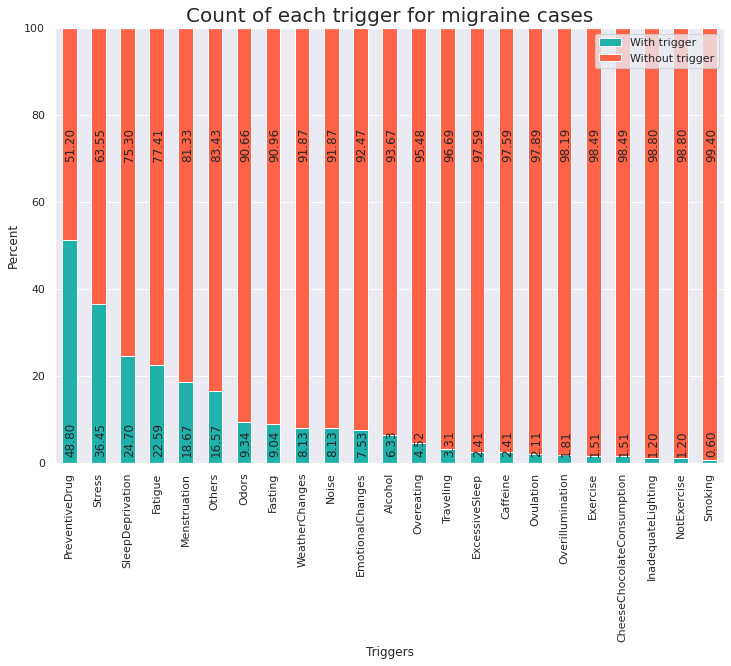

In [ ]:
TrigTable2 = TrigTable.drop([0,1],axis=1)
ax = TrigTable2.plot.bar(stacked=True, color =['lightseagreen', 'tomato'], figsize=(12,8))
ax.set_title('Count of each trigger for migraine cases', fontsize=20)
ax.set_ylim(0,100)
ax.set_xlabel('Triggers')
ax.set_ylabel('Percent')

for p in ax.patches:
    p_get_height = p.get_height()/2
    if p.get_height() > 50:
      p_get_height = 70
    elif p.get_height() < 49.9999:
      p_get_height= 2

    ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() , p_get_height),
                  #  ha = 'center', va = 'center',
                   size=12,
                   rotation = 90,
                   xytext = (-12, 0),
                   textcoords = 'offset points')


In [ ]:
#confirm balance of label
print("Non-Migraine: ",str(round(len(data.loc[data['Migraine']==0])/len(data)*100,2)),"%")
print("Migraine: ",str(round(len(data.loc[data['Migraine']==1])/len(data)*100,2)),"%")


Non-Migraine:  92.69 %
Migraine:  7.31 %


In [ ]:
print("Female: ",str(round(len(data.loc[data['Gender']==1])/len(data)*100,2)),"%")
print("Male: ",str(round(len(data.loc[data['Gender']==0])/len(data)*100,2)),"%")

Female:  81.7 %
Male:  18.3 %


In [ ]:
print("=====================================================================")
print('count')
print("Female without migraine =",str(len(data[(data['Gender'] == 1) & (data['Migraine'] == 0.0)])))
print("Female with migraine =",str(len(data[(data['Gender'] == 1) & (data['Migraine'] == 1.0)])))
print("Male without migraine =",str(len(data[(data['Gender'] == 0) & (data['Migraine'] == 0.0)])))
print("Male with migraine =",str(len(data[(data['Gender'] == 0) & (data['Migraine'] == 1.0)])))
print("=====================================================================")
print("percent")
print("Female without migraine =",round(float(str(len(data[(data['Gender'] == 1) & (data['Migraine'] == 0.0)])/len(data) * 100)),2),'%')
print("Female with migraine =",round(float(str(len(data[(data['Gender'] == 1) & (data['Migraine'] == 1.0)])/len(data) * 100)),2),'%')
print("Male without migraine =",round(float(str(len(data[(data['Gender'] == 0) & (data['Migraine'] == 0.0)])/len(data) * 100)),2),'%')
print("Male with migraine =",round(float(str(len(data[(data['Gender'] == 0) & (data['Migraine'] == 1.0)])/len(data) * 100)),2),'%')
print("=====================================================================")

count
Female without migraine = 3409
Female with migraine = 300
Male without migraine = 799
Male with migraine = 32
percent
Female without migraine = 75.09 %
Female with migraine = 6.61 %
Male without migraine = 17.6 %
Male with migraine = 0.7 %


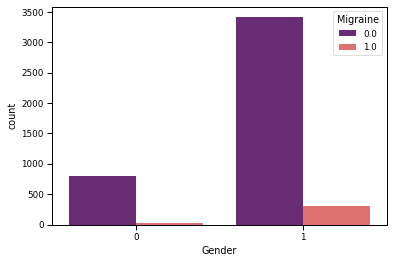

In [ ]:
sns.set_context('paper')
sns.countplot(x = 'Gender', hue = 'Migraine', data = data, palette = 'magma')


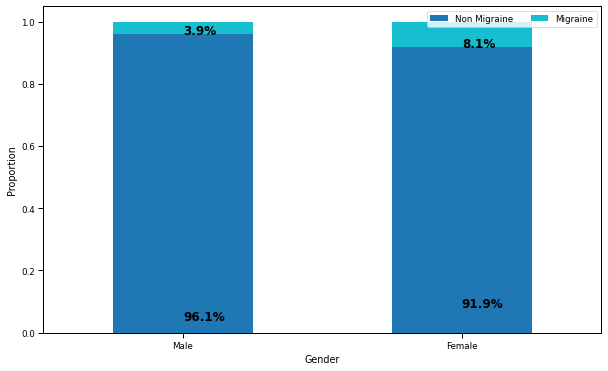

In [ ]:
cross_tab_prop = pd.crosstab(index=data['Gender'],
                             columns=data['Migraine'],
                             normalize= 'index')
cross_tab_prop


cross_tab = pd.crosstab(index=data['Gender'],
                        columns=data['Migraine'])
cross_tab

cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.xticks(np.arange(2), ['Male','Female'],rotation = 0)
plt.legend(['Non Migraine', 'Migraine'],loc="upper right", ncol=2)

for n, x in enumerate([*cross_tab.index.values]):
    for proportion in cross_tab_prop.loc[x]:

        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(100- proportion * 100, 1)}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

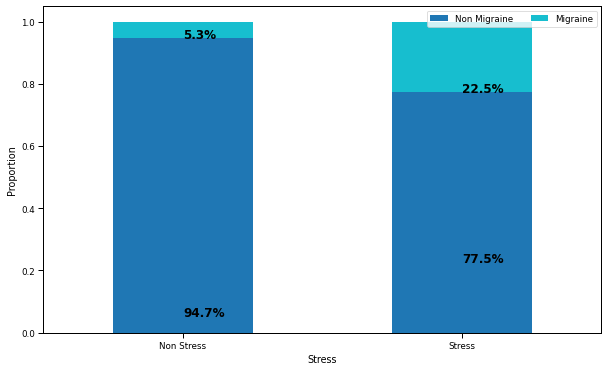

In [ ]:
cross_tab_prop1 = pd.crosstab(index=data['Stress'],
                             columns=data['Migraine'],
                             normalize= 'index')

cross_tab1 = pd.crosstab(index=data['Stress'],
                        columns=data['Migraine'])

cross_tab_prop1.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))
plt.xlabel("Stress")
plt.ylabel("Proportion")
plt.xticks(np.arange(2), ['Non Stress','Stress'],rotation = 0)
plt.legend(['Non Migraine', 'Migraine'],loc="upper right", ncol=2)
for n, x in enumerate([*cross_tab1.index.values]):
    for proportion in cross_tab_prop1.loc[x]:

        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(100- proportion * 100, 1)}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")


plt.show()

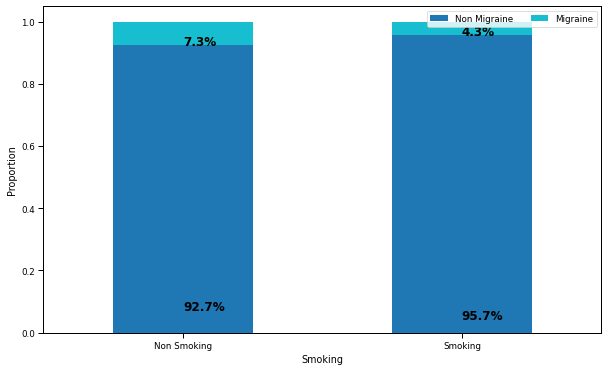

In [ ]:
smoke_prop = pd.crosstab(index=data['Smoking'],
                             columns=data['Migraine'],
                             normalize= 'index')

smoke = pd.crosstab(index=data['Smoking'],
                        columns=data['Migraine'])

smoke_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Smoking")
plt.ylabel("Proportion")
plt.xticks(np.arange(2), ['Non Smoking','Smoking'],rotation = 0)
plt.legend(['Non Migraine', 'Migraine'],loc="upper right", ncol=2)

for n, x in enumerate([*smoke.index.values]):
    for proportion in smoke_prop.loc[x]:

        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(100- proportion * 100, 1)}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

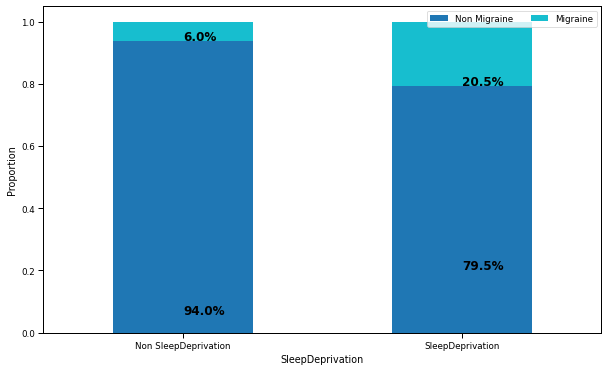

In [ ]:
SleepDeprivation_prop = pd.crosstab(index=data['SleepDeprivation'],
                             columns=data['Migraine'],
                             normalize= 'index')

SleepDeprivation = pd.crosstab(index=data['SleepDeprivation'],
                        columns=data['Migraine'])

SleepDeprivation_prop.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("SleepDeprivation")
plt.ylabel("Proportion")
plt.xticks(np.arange(2), ['Non SleepDeprivation','SleepDeprivation'],rotation = 0)
plt.legend(['Non Migraine', 'Migraine'],loc="upper right", ncol=2)

for n, x in enumerate([*SleepDeprivation.index.values]):
    for proportion in SleepDeprivation_prop.loc[x]:

        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(100- proportion * 100, 1)}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

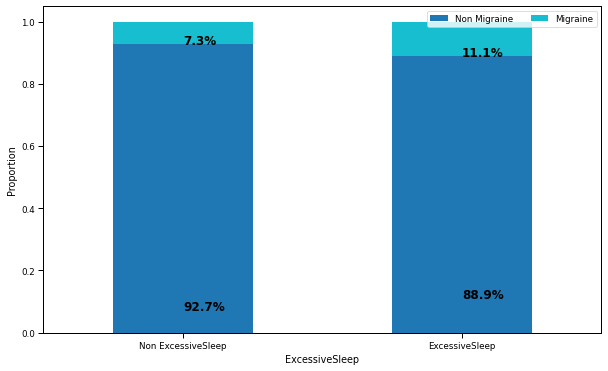

In [ ]:
cross_tab_prop1 = pd.crosstab(index=data['ExcessiveSleep'],
                             columns=data['Migraine'],
                             normalize= 'index')

cross_tab1 = pd.crosstab(index=data['ExcessiveSleep'],
                        columns=data['Migraine'])

cross_tab_prop1.plot(kind='bar',
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("ExcessiveSleep")
plt.ylabel("Proportion")
plt.xticks(np.arange(2), ['Non ExcessiveSleep','ExcessiveSleep'],rotation = 0)
plt.legend(['Non Migraine', 'Migraine'],loc="upper right", ncol=2)

for n, x in enumerate([*cross_tab1.index.values]):
    for proportion in cross_tab_prop1.loc[x]:

        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(100- proportion * 100, 1)}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

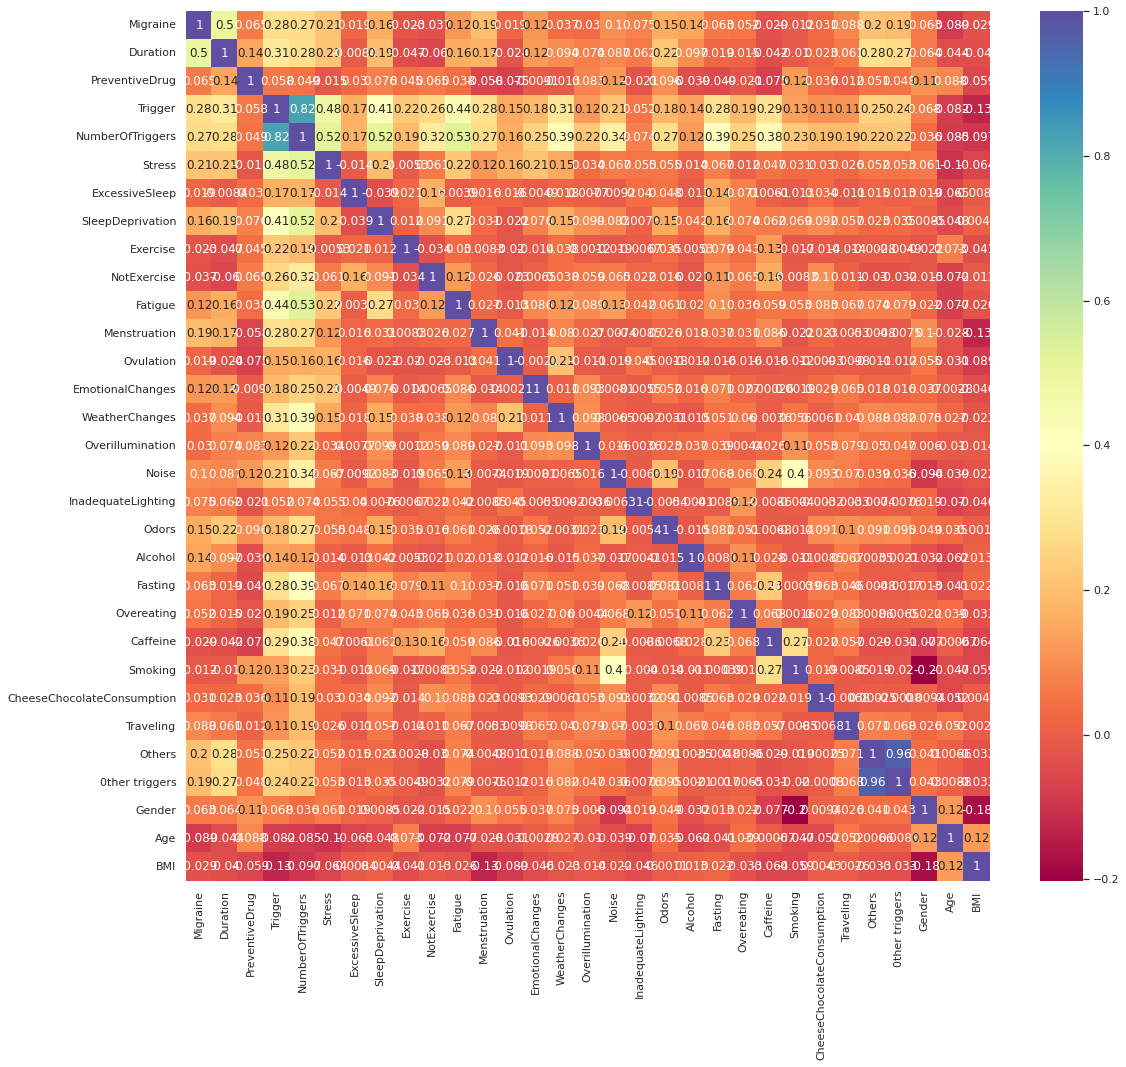

In [ ]:
data.insert(0, 'Migraine', data.pop('Migraine'))
sns.set()
plt.figure(figsize=(18,16))
p=sns.heatmap(data.corr(), annot=True,cmap ='Spectral')

In [ ]:
# all_list_feature = data.columns.tolist()
# list_not_migrane = [all_list_feature[i] for i in range(len(all_list_feature)) if all_list_feature[i] != 'Migraine']
list_not_migrane = TriggerOnly.columns.tolist()
data_all = pd.DataFrame()
# print(data2)
for i in range(len(list_not_migrane)):
  for j in range(len(list_not_migrane)):
    try:
      if i != j:
        data_all[f'{list_not_migrane[i]}_{list_not_migrane[j]}'] = (data[f'{list_not_migrane[i]}'] == 0.0 )& (data[f'{list_not_migrane[j]}'] == 0.0)
        data_all[f'{list_not_migrane[i]}_{list_not_migrane[j]}'] = data_all[f'{list_not_migrane[i]}_{list_not_migrane[j]}'].replace({False:0,True:1})
        # print(list_not_migrane[i])
    except:
      pass
      print(f'{list_not_migrane[i]}_{list_not_migrane[j]}')

# data_all
print(list_not_migrane)



['PreventiveDrug', 'Stress', 'ExcessiveSleep', 'SleepDeprivation', 'Exercise', 'NotExercise', 'Fatigue', 'Menstruation', 'Ovulation', 'EmotionalChanges', 'WeatherChanges', 'Overillumination', 'Noise', 'InadequateLighting', 'Odors', 'Alcohol', 'Fasting', 'Overeating', 'Caffeine', 'Smoking', 'CheeseChocolateConsumption', 'Traveling', 'Others']


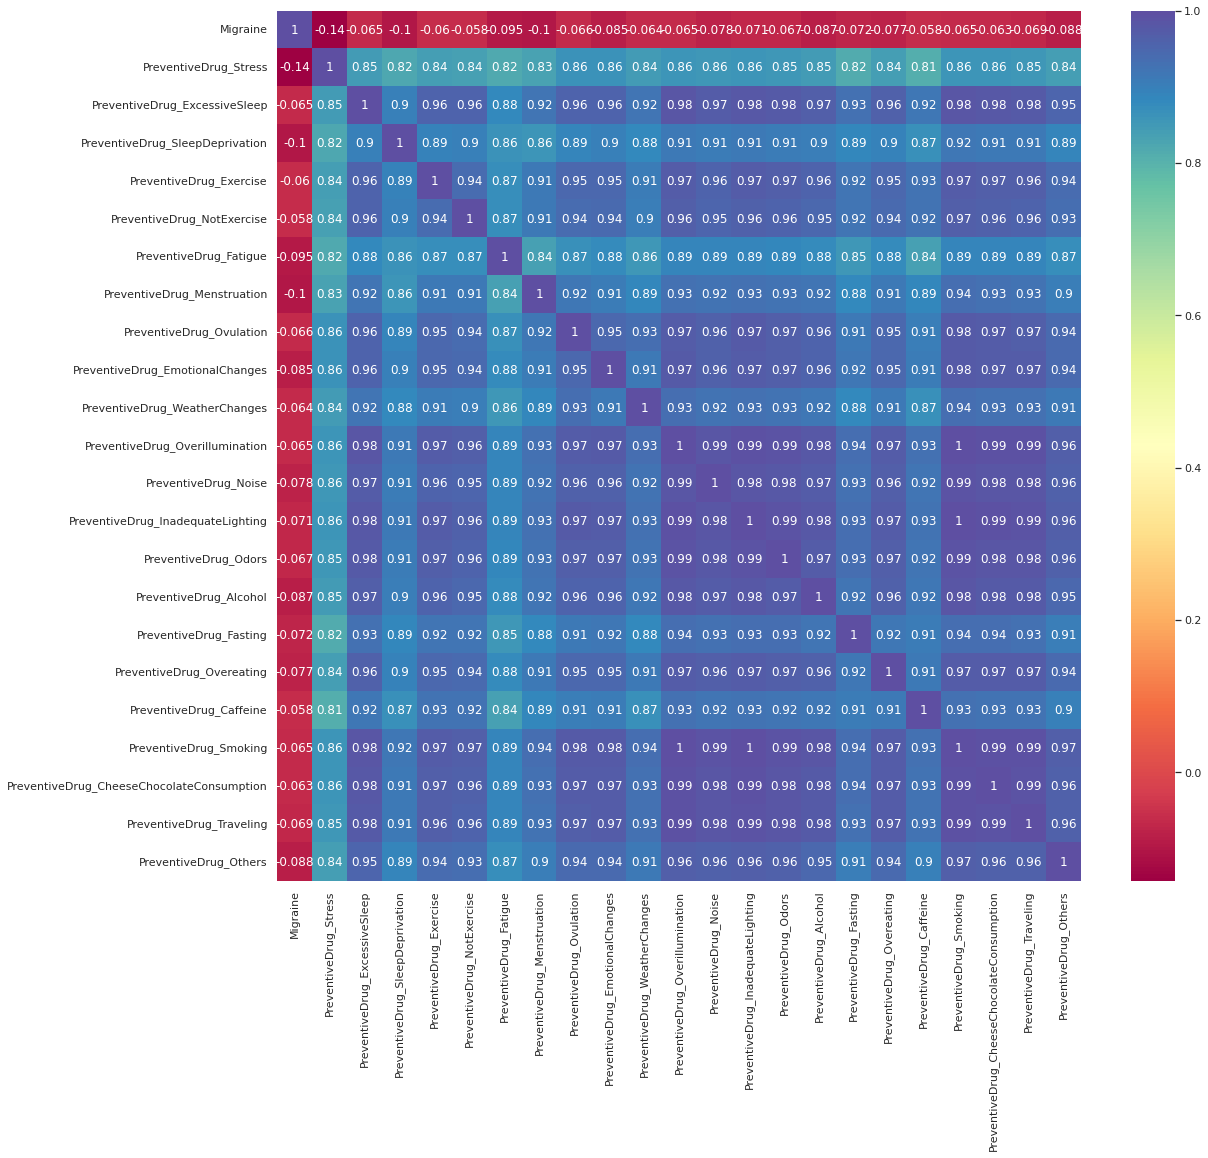

In [ ]:
df1 = data_all.iloc[:, 0:22]
df1['Migraine']=data['Migraine']
df1.insert(0, 'Migraine', df1.pop('Migraine'))
sns.set()
plt.figure(figsize=(18,16))
p=sns.heatmap(df1.corr(), annot=True,cmap ='Spectral')

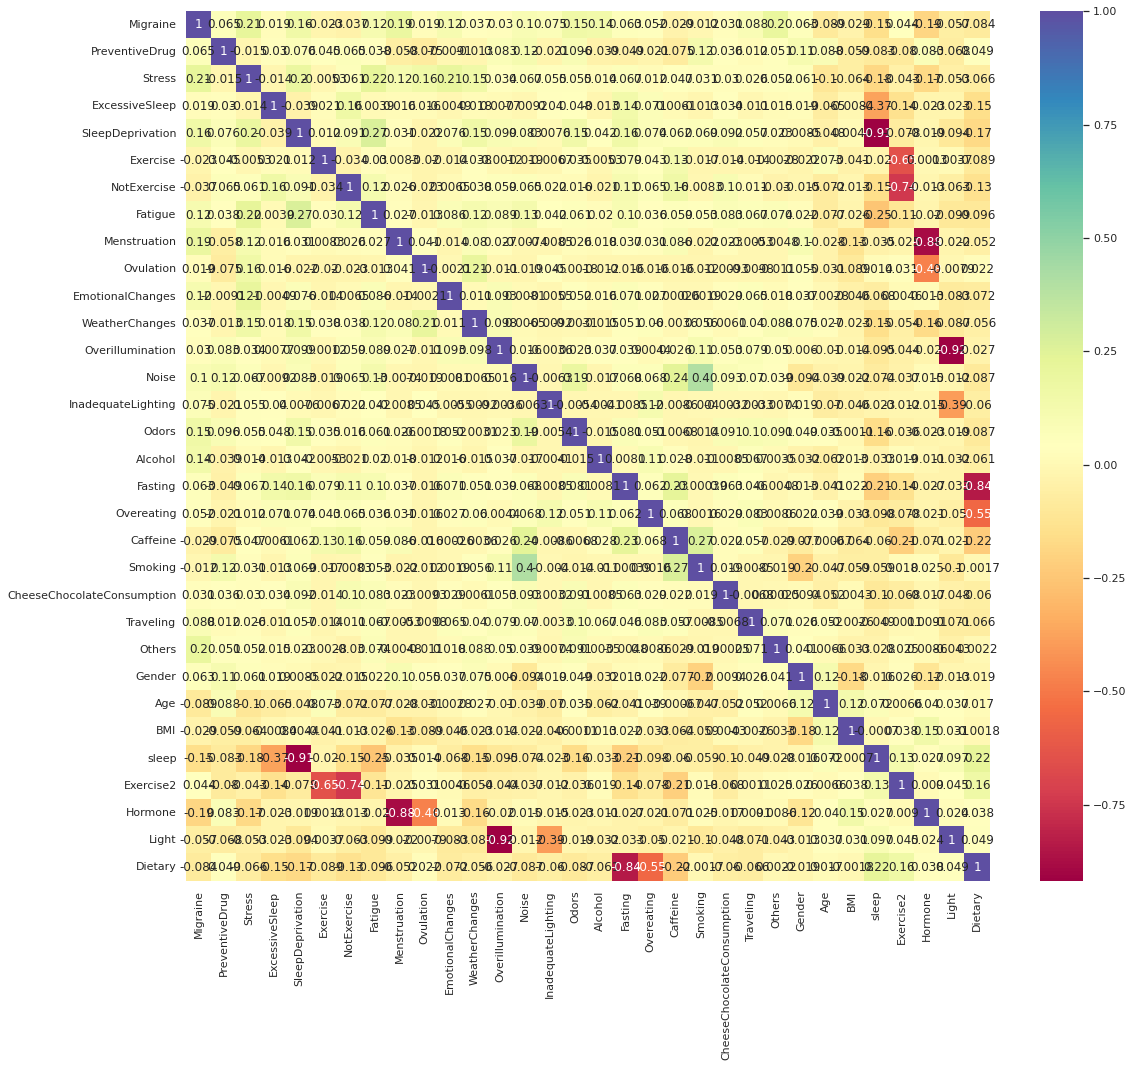

In [ ]:
#Merge columns in same category into 1 column to see impact

data2 = data.copy(deep=True)
data2 = data2.drop(['Duration','Trigger','NumberOfTriggers','0ther triggers'],axis=1)

data2['sleep'] = (data2['ExcessiveSleep'] == 0.0 )& (data2['SleepDeprivation'] == 0.0)
data2['sleep'] = data2['sleep'].replace({False:0,True:1})

data2['Exercise2'] = (data2['Exercise'] == 0.0 )& (data2['NotExercise'] == 0.0)
data2['Exercise2'] = data2['Exercise2'].replace({False:0,True:1})

data2['Hormone'] = (data2['Menstruation'] == 0.0 )& (data2['Ovulation'] == 0.0)
data2['Hormone'] = data2['Hormone'].replace({False:0,True:1})

data2['Light'] = (data2['Overillumination'] == 0.0 )& (data2['InadequateLighting'] == 0.0)
data2['Light'] = data2['Light'].replace({False:0,True:1})

data2['Dietary'] = (data2['Fasting'] == 0.0 )& (data2['Overeating'] == 0.0)
data2['Dietary'] = data2['Dietary'].replace({False:0,True:1})
data2.insert(0, 'Migraine', data2.pop('Migraine'))
# correlation matrix with original columns
sns.set()
plt.figure(figsize=(18,16))
p=sns.heatmap(data2.corr(), annot=True,cmap ='Spectral')

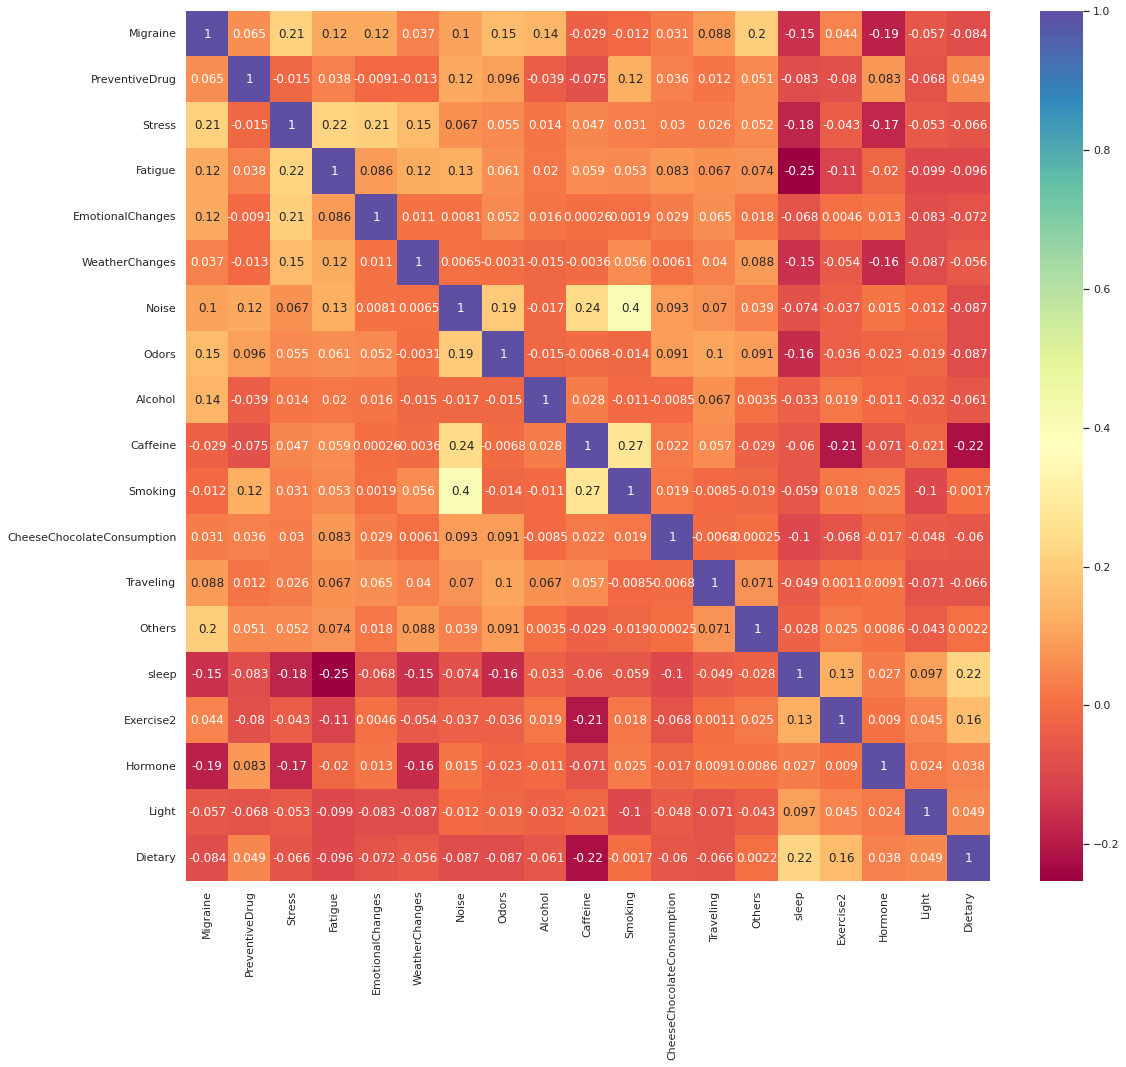

In [ ]:
data2 = data2.drop(['ExcessiveSleep','SleepDeprivation','Exercise','NotExercise','Menstruation','Ovulation','Overillumination','InadequateLighting','Fasting','Overeating'],axis=1)

# correlation matrix without original columns
sns.set()
plt.figure(figsize=(18,16))
p=sns.heatmap(data2.corr(), annot=True,cmap ='Spectral')

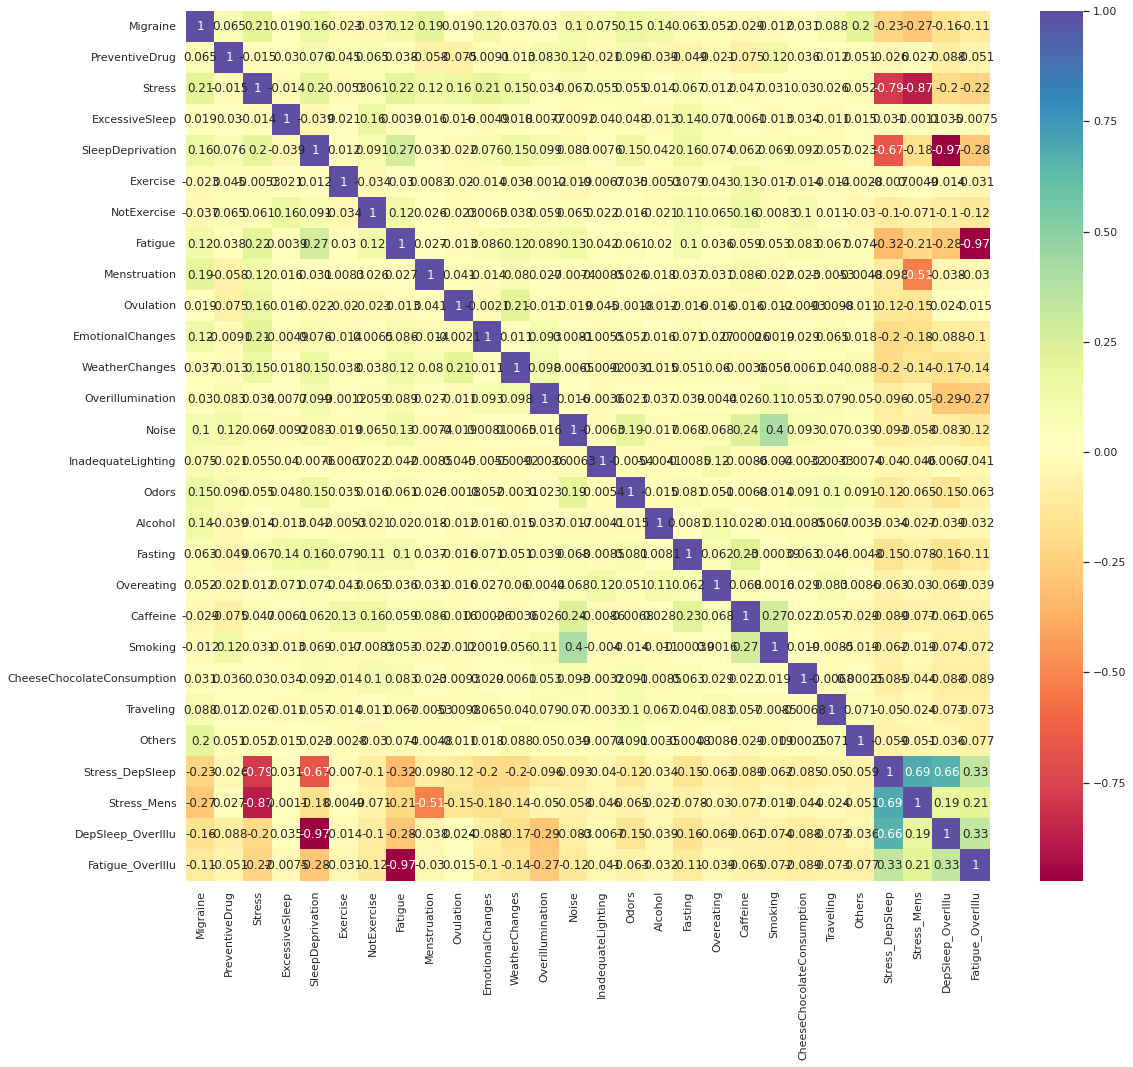

In [ ]:
#Merge data in different category to see impact
data3 = data.copy(deep=True)
data3 = data3.drop(['Duration','Trigger','NumberOfTriggers','Age','Gender','BMI','0ther triggers'],axis=1)
#  Stress and SleepDeprivation
data3['Stress_DepSleep'] = (data3['SleepDeprivation'] == 0.0 )& (data3['Stress'] == 0.0)
data3['Stress_DepSleep']= data3['Stress_DepSleep'].replace({False:0,True:1})
#  Stress and Menstruation
data3['Stress_Mens'] = (data3['Menstruation'] == 0.0 )& (data3['Stress'] == 0.0)
data3['Stress_Mens']= data3['Stress_Mens'].replace({False:0,True:1})
# SleepDeprivation and Overillumination
data3['DepSleep_OverIllu'] = (data3['SleepDeprivation'] == 0.0 )& (data3['Overillumination'] == 0.0)
data3['DepSleep_OverIllu']= data3['DepSleep_OverIllu'].replace({False:0,True:1})
# Fatigue and Overillumination
data3['Fatigue_OverIllu'] = (data3['Fatigue'] == 0.0 )& (data3['Overillumination'] == 0.0)
data3['Fatigue_OverIllu']= data3['Fatigue_OverIllu'].replace({False:0,True:1})

data3.insert(0, 'Migraine', data3.pop('Migraine'))
# correlation matrix with original columns
sns.set()
plt.figure(figsize=(18,16))
p=sns.heatmap(data3.corr(), annot=True,cmap ='Spectral')


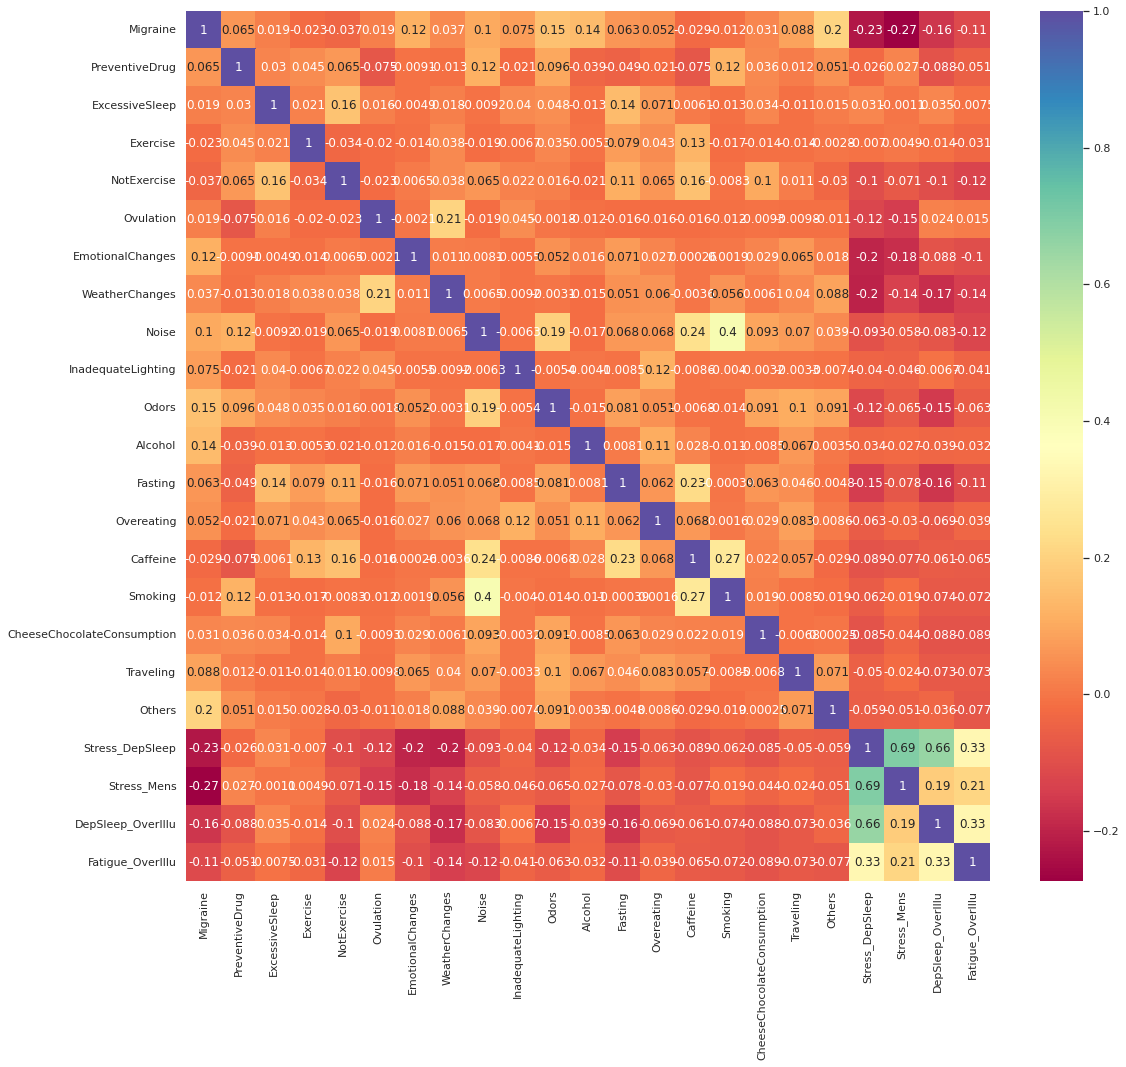

In [ ]:

data3 = data3.drop(['SleepDeprivation','Stress','Menstruation','Overillumination','Fatigue'],axis=1)

sns.set()
plt.figure(figsize=(18,16))
p=sns.heatmap(data3.corr(), annot=True,cmap ='Spectral')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4540 entries, 0 to 4539
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Duration                    4540 non-null   float64
 1   PreventiveDrug              4540 non-null   int64  
 2   Migraine                    4540 non-null   float64
 3   Trigger                     4540 non-null   int64  
 4   NumberOfTriggers            4540 non-null   int64  
 5   Stress                      4540 non-null   float64
 6   ExcessiveSleep              4540 non-null   float64
 7   SleepDeprivation            4540 non-null   float64
 8   Exercise                    4540 non-null   float64
 9   NotExercise                 4540 non-null   float64
 10  Fatigue                     4540 non-null   float64
 11  Menstruation                4540 non-null   float64
 12  Ovulation                   4540 non-null   float64
 13  EmotionalChanges            4540 

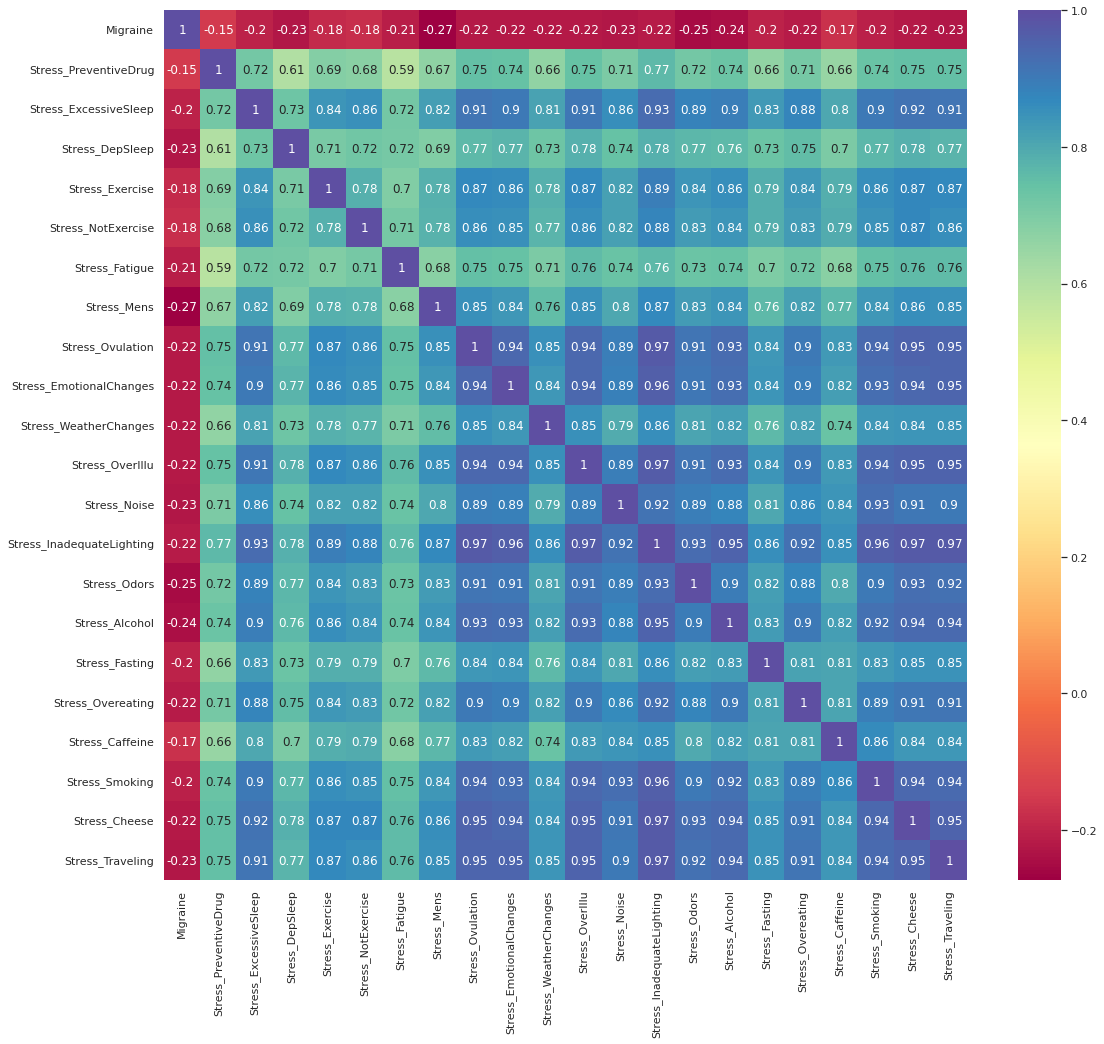

In [ ]:
#Merge Stress with other features
dataStress = pd.DataFrame()
# dataStress = dataS.drop(['Duration','Trigger','NumberOfTriggers','0ther triggers'],axis=1)
dataStress['Migraine'] = data['Migraine']
#  Stress and PreventiveDrug
dataStress['Stress_PreventiveDrug'] = (data['PreventiveDrug'] == 0.0 )& (data['Stress'] == 0.0)
dataStress['Stress_PreventiveDrug']= dataStress['Stress_PreventiveDrug'].replace({False:0,True:1})
#  Stress and ExcessiveSleep
dataStress['Stress_ExcessiveSleep'] = (data['ExcessiveSleep'] == 0.0 )& (data['Stress'] == 0.0)
dataStress['Stress_ExcessiveSleep']= dataStress['Stress_ExcessiveSleep'].replace({False:0,True:1})
#  Stress and SleepDeprivation
dataStress['Stress_DepSleep'] = (data['SleepDeprivation'] == 0.0 )& (data['Stress'] == 0.0)
dataStress['Stress_DepSleep']= dataStress['Stress_DepSleep'].replace({False:0,True:1})
# Stress and Exercise
dataStress['Stress_Exercise'] = (data['Exercise'] == 0.0)& (data['Stress'] == 0.0)
dataStress['Stress_Exercise']= dataStress['Stress_Exercise'].replace({False:0,True:1})
# Stress and NotExercise
dataStress['Stress_NotExercise'] = (data['NotExercise'] == 0.0 )& (data['Stress'] == 0.0)
dataStress['Stress_NotExercise']= dataStress['Stress_NotExercise'].replace({False:0,True:1})
# Stress and Fatigue
dataStress['Stress_Fatigue'] = (data['Fatigue'] == 0.0 )& (data['Stress'] == 0.0)
dataStress['Stress_Fatigue']= dataStress['Stress_Fatigue'].replace({False:0,True:1})
#  Stress and Menstruation
dataStress['Stress_Mens'] = (data['Menstruation'] == 0.0 )& (data['Stress'] == 0.0)
dataStress['Stress_Mens']= dataStress['Stress_Mens'].replace({False:0,True:1})
#  Stress and Ovulation
dataStress['Stress_Ovulation'] = (data['Ovulation'] == 0.0 )& (data['Stress'] == 0.0)
dataStress['Stress_Ovulation']= dataStress['Stress_Ovulation'].replace({False:0,True:1})
#  Stress and EmotionalChanges
dataStress['Stress_EmotionalChanges'] = (data['EmotionalChanges'] == 0.0 )& (data['Stress'] == 0.0)
dataStress['Stress_EmotionalChanges']= dataStress['Stress_EmotionalChanges'].replace({False:0,True:1})
#  Stress and WeatherChanges
dataStress['Stress_WeatherChanges'] = (data['WeatherChanges'] == 0.0 )& (data['Stress'] == 0.0)
dataStress['Stress_WeatherChanges']= dataStress['Stress_WeatherChanges'].replace({False:0,True:1})
# Stress and Overillumination
dataStress['Stress_OverIllu'] = (data['Overillumination'] == 0.0)& (data['Stress'] == 0.0)
dataStress['Stress_OverIllu']= dataStress['Stress_OverIllu'].replace({False:0,True:1})
#  Stress and Noise
dataStress['Stress_Noise'] = (data['Noise'] == 0.0 )& (data['Stress'] == 0.0)
dataStress['Stress_Noise']= dataStress['Stress_Noise'].replace({False:0,True:1})
#  Stress and InadequateLighting
dataStress['Stress_InadequateLighting'] = (data['InadequateLighting'] == 0.0 )& (data['Stress'] == 0.0)
dataStress['Stress_InadequateLighting']= dataStress['Stress_InadequateLighting'].replace({False:0,True:1})
#  Stress and Odors
dataStress['Stress_Odors'] = (data['Odors'] == 0.0 )& (data['Stress'] == 0.0)
dataStress['Stress_Odors']= dataStress['Stress_Odors'].replace({False:0,True:1})
#  Stress and Alcohol
dataStress['Stress_Alcohol'] = (data['Alcohol'] == 0.0 )& (data['Stress'] == 0.0)
dataStress['Stress_Alcohol']= dataStress['Stress_Alcohol'].replace({False:0,True:1})
#  Stress and Fasting
dataStress['Stress_Fasting'] = (data['Fasting'] == 0.0 )& (data['Stress'] == 0.0)
dataStress['Stress_Fasting']= dataStress['Stress_Fasting'].replace({False:0,True:1})
#  Stress and Overeating
dataStress['Stress_Overeating'] = (data['Overeating'] == 0.0 )& (data['Stress'] == 0.0)
dataStress['Stress_Overeating']= dataStress['Stress_Overeating'].replace({False:0,True:1})
#  Stress and Caffeine
dataStress['Stress_Caffeine'] = (data['Caffeine'] == 0.0 )& (data['Stress'] == 0.0)
dataStress['Stress_Caffeine']= dataStress['Stress_Caffeine'].replace({False:0,True:1})
#  Stress and Smoking
dataStress['Stress_Smoking'] = (data['Smoking'] == 0.0 )& (data['Stress'] == 0.0)
dataStress['Stress_Smoking']= dataStress['Stress_Smoking'].replace({False:0,True:1})
#  Stress and CheeseChocolateConsumption
dataStress['Stress_Cheese'] = (data['CheeseChocolateConsumption'] == 0.0 )& (data['Stress'] == 0.0)
dataStress['Stress_Cheese']= dataStress['Stress_Cheese'].replace({False:0,True:1})
#  Stress and Traveling
dataStress['Stress_Traveling'] = (data['Traveling'] == 0.0 )& (data['Stress'] == 0.0)
dataStress['Stress_Traveling']= dataStress['Stress_Traveling'].replace({False:0,True:1})


dataStress.insert(0, 'Migraine', dataStress.pop('Migraine'))
# correlation matrix with original columns
sns.set()
plt.figure(figsize=(18,16))
p=sns.heatmap(dataStress.corr(), annot=True,cmap ='Spectral')

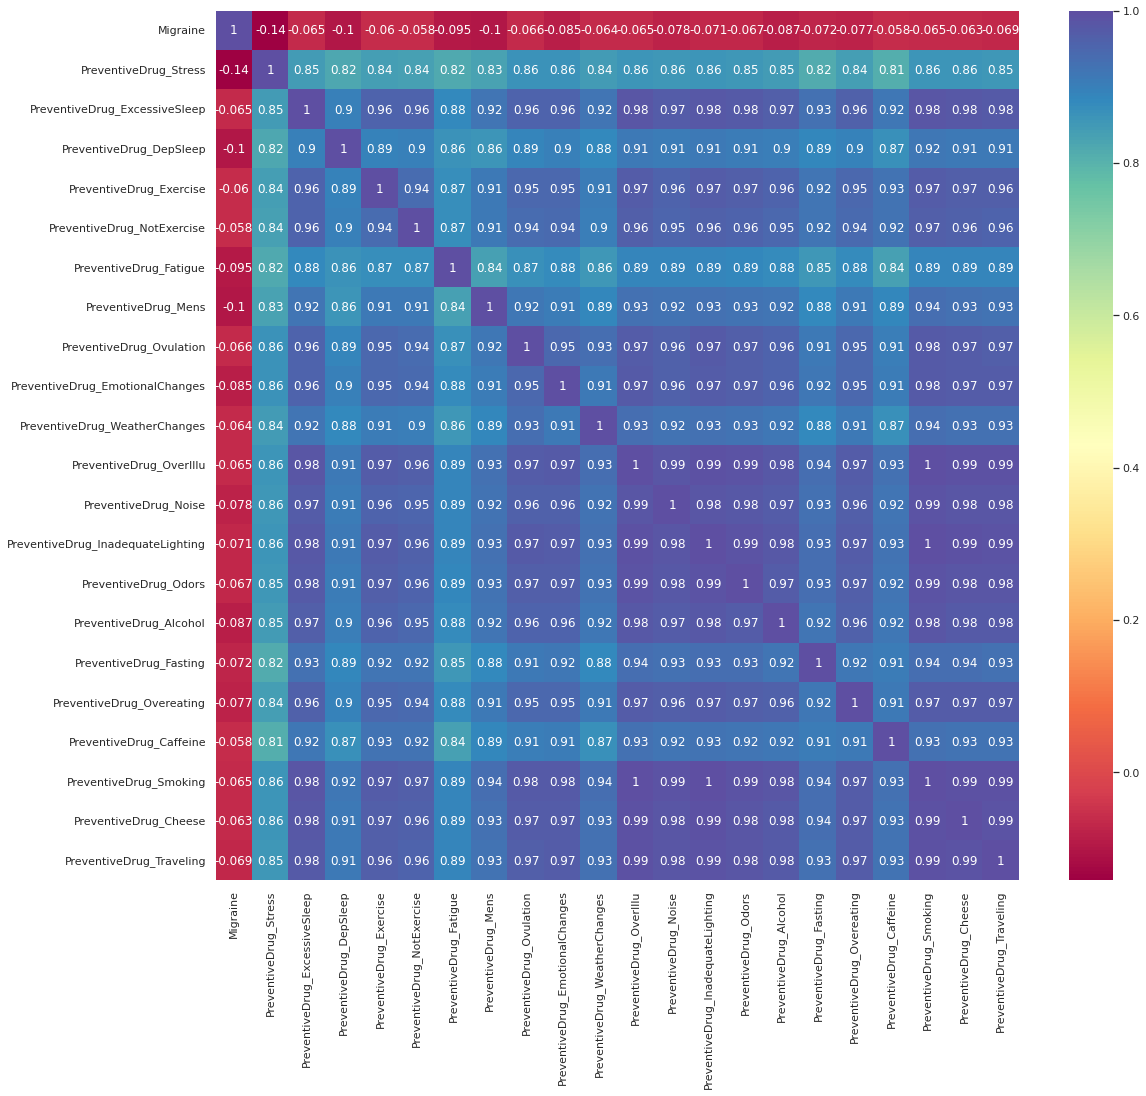

In [ ]:
#Merge Stress with other features
dataPreventiveDrug = pd.DataFrame()
# dataStress = dataS.drop(['Duration','Trigger','NumberOfTriggers','0ther triggers'],axis=1)
dataPreventiveDrug['Migraine'] = data['Migraine']
#  PreventiveDrug and PreventiveDrug
dataPreventiveDrug['PreventiveDrug_Stress'] = (data['PreventiveDrug'] == 0.0 )& (data['Stress'] == 0.0)
dataPreventiveDrug['PreventiveDrug_Stress']= dataPreventiveDrug['PreventiveDrug_Stress'].replace({False:0,True:1})
#  PreventiveDrug and ExcessiveSleep
dataPreventiveDrug['PreventiveDrug_ExcessiveSleep'] = (data['ExcessiveSleep'] == 0.0 )& (data['PreventiveDrug'] == 0.0)
dataPreventiveDrug['PreventiveDrug_ExcessiveSleep']= dataPreventiveDrug['PreventiveDrug_ExcessiveSleep'].replace({False:0,True:1})
#  PreventiveDrug and SleepDeprivation
dataPreventiveDrug['PreventiveDrug_DepSleep'] = (data['SleepDeprivation'] == 0.0 )& (data['PreventiveDrug'] == 0.0)
dataPreventiveDrug['PreventiveDrug_DepSleep']= dataPreventiveDrug['PreventiveDrug_DepSleep'].replace({False:0,True:1})
# PreventiveDrug and Exercise
dataPreventiveDrug['PreventiveDrug_Exercise'] = (data['Exercise'] == 0.0)& (data['PreventiveDrug'] == 0.0)
dataPreventiveDrug['PreventiveDrug_Exercise']= dataPreventiveDrug['PreventiveDrug_Exercise'].replace({False:0,True:1})
# PreventiveDrug and NotExercise
dataPreventiveDrug['PreventiveDrug_NotExercise'] = (data['NotExercise'] == 0.0 )& (data['PreventiveDrug'] == 0.0)
dataPreventiveDrug['PreventiveDrug_NotExercise']= dataPreventiveDrug['PreventiveDrug_NotExercise'].replace({False:0,True:1})
# PreventiveDrug and Fatigue
dataPreventiveDrug['PreventiveDrug_Fatigue'] = (data['Fatigue'] == 0.0 )& (data['PreventiveDrug'] == 0.0)
dataPreventiveDrug['PreventiveDrug_Fatigue']= dataPreventiveDrug['PreventiveDrug_Fatigue'].replace({False:0,True:1})
#  PreventiveDrug and Menstruation
dataPreventiveDrug['PreventiveDrug_Mens'] = (data['Menstruation'] == 0.0 )& (data['PreventiveDrug'] == 0.0)
dataPreventiveDrug['PreventiveDrug_Mens']= dataPreventiveDrug['PreventiveDrug_Mens'].replace({False:0,True:1})
#  PreventiveDrug and Ovulation
dataPreventiveDrug['PreventiveDrug_Ovulation'] = (data['Ovulation'] == 0.0 )& (data['PreventiveDrug'] == 0.0)
dataPreventiveDrug['PreventiveDrug_Ovulation']= dataPreventiveDrug['PreventiveDrug_Ovulation'].replace({False:0,True:1})
#  PreventiveDrug and EmotionalChanges
dataPreventiveDrug['PreventiveDrug_EmotionalChanges'] = (data['EmotionalChanges'] == 0.0 )& (data['PreventiveDrug'] == 0.0)
dataPreventiveDrug['PreventiveDrug_EmotionalChanges']= dataPreventiveDrug['PreventiveDrug_EmotionalChanges'].replace({False:0,True:1})
#  PreventiveDrug and WeatherChanges
dataPreventiveDrug['PreventiveDrug_WeatherChanges'] = (data['WeatherChanges'] == 0.0 )& (data['PreventiveDrug'] == 0.0)
dataPreventiveDrug['PreventiveDrug_WeatherChanges']= dataPreventiveDrug['PreventiveDrug_WeatherChanges'].replace({False:0,True:1})
# PreventiveDrug and Overillumination
dataPreventiveDrug['PreventiveDrug_OverIllu'] = (data['Overillumination'] == 0.0)& (data['PreventiveDrug'] == 0.0)
dataPreventiveDrug['PreventiveDrug_OverIllu']= dataPreventiveDrug['PreventiveDrug_OverIllu'].replace({False:0,True:1})
#  PreventiveDrug and Noise
dataPreventiveDrug['PreventiveDrug_Noise'] = (data['Noise'] == 0.0 )& (data['PreventiveDrug'] == 0.0)
dataPreventiveDrug['PreventiveDrug_Noise']= dataPreventiveDrug['PreventiveDrug_Noise'].replace({False:0,True:1})
#  PreventiveDrug and InadequateLighting
dataPreventiveDrug['PreventiveDrug_InadequateLighting'] = (data['InadequateLighting'] == 0.0 )& (data['PreventiveDrug'] == 0.0)
dataPreventiveDrug['PreventiveDrug_InadequateLighting']= dataPreventiveDrug['PreventiveDrug_InadequateLighting'].replace({False:0,True:1})
#  PreventiveDrug and Odors
dataPreventiveDrug['PreventiveDrug_Odors'] = (data['Odors'] == 0.0 )& (data['PreventiveDrug'] == 0.0)
dataPreventiveDrug['PreventiveDrug_Odors']= dataPreventiveDrug['PreventiveDrug_Odors'].replace({False:0,True:1})
#  PreventiveDrug and Alcohol
dataPreventiveDrug['PreventiveDrug_Alcohol'] = (data['Alcohol'] == 0.0 )& (data['PreventiveDrug'] == 0.0)
dataPreventiveDrug['PreventiveDrug_Alcohol']= dataPreventiveDrug['PreventiveDrug_Alcohol'].replace({False:0,True:1})
#  PreventiveDrug and Fasting
dataPreventiveDrug['PreventiveDrug_Fasting'] = (data['Fasting'] == 0.0 )& (data['PreventiveDrug'] == 0.0)
dataPreventiveDrug['PreventiveDrug_Fasting']= dataPreventiveDrug['PreventiveDrug_Fasting'].replace({False:0,True:1})
#  PreventiveDrug and Overeating
dataPreventiveDrug['PreventiveDrug_Overeating'] = (data['Overeating'] == 0.0 )& (data['PreventiveDrug'] == 0.0)
dataPreventiveDrug['PreventiveDrug_Overeating']= dataPreventiveDrug['PreventiveDrug_Overeating'].replace({False:0,True:1})
#  PreventiveDrug and Caffeine
dataPreventiveDrug['PreventiveDrug_Caffeine'] = (data['Caffeine'] == 0.0 )& (data['PreventiveDrug'] == 0.0)
dataPreventiveDrug['PreventiveDrug_Caffeine']= dataPreventiveDrug['PreventiveDrug_Caffeine'].replace({False:0,True:1})
#  PreventiveDrug and Smoking
dataPreventiveDrug['PreventiveDrug_Smoking'] = (data['Smoking'] == 0.0 )& (data['PreventiveDrug'] == 0.0)
dataPreventiveDrug['PreventiveDrug_Smoking']= dataPreventiveDrug['PreventiveDrug_Smoking'].replace({False:0,True:1})
#  PreventiveDrug and CheeseChocolateConsumption
dataPreventiveDrug['PreventiveDrug_Cheese'] = (data['CheeseChocolateConsumption'] == 0.0 )& (data['PreventiveDrug'] == 0.0)
dataPreventiveDrug['PreventiveDrug_Cheese']= dataPreventiveDrug['PreventiveDrug_Cheese'].replace({False:0,True:1})
#  PreventiveDrug and Traveling
dataPreventiveDrug['PreventiveDrug_Traveling'] = (data['Traveling'] == 0.0 )& (data['PreventiveDrug'] == 0.0)
dataPreventiveDrug['PreventiveDrug_Traveling']= dataPreventiveDrug['PreventiveDrug_Traveling'].replace({False:0,True:1})


dataPreventiveDrug.insert(0, 'Migraine', dataPreventiveDrug.pop('Migraine'))
# correlation matrix with original columns
sns.set()
plt.figure(figsize=(18,16))
p=sns.heatmap(dataPreventiveDrug.corr(), annot=True,cmap ='Spectral')

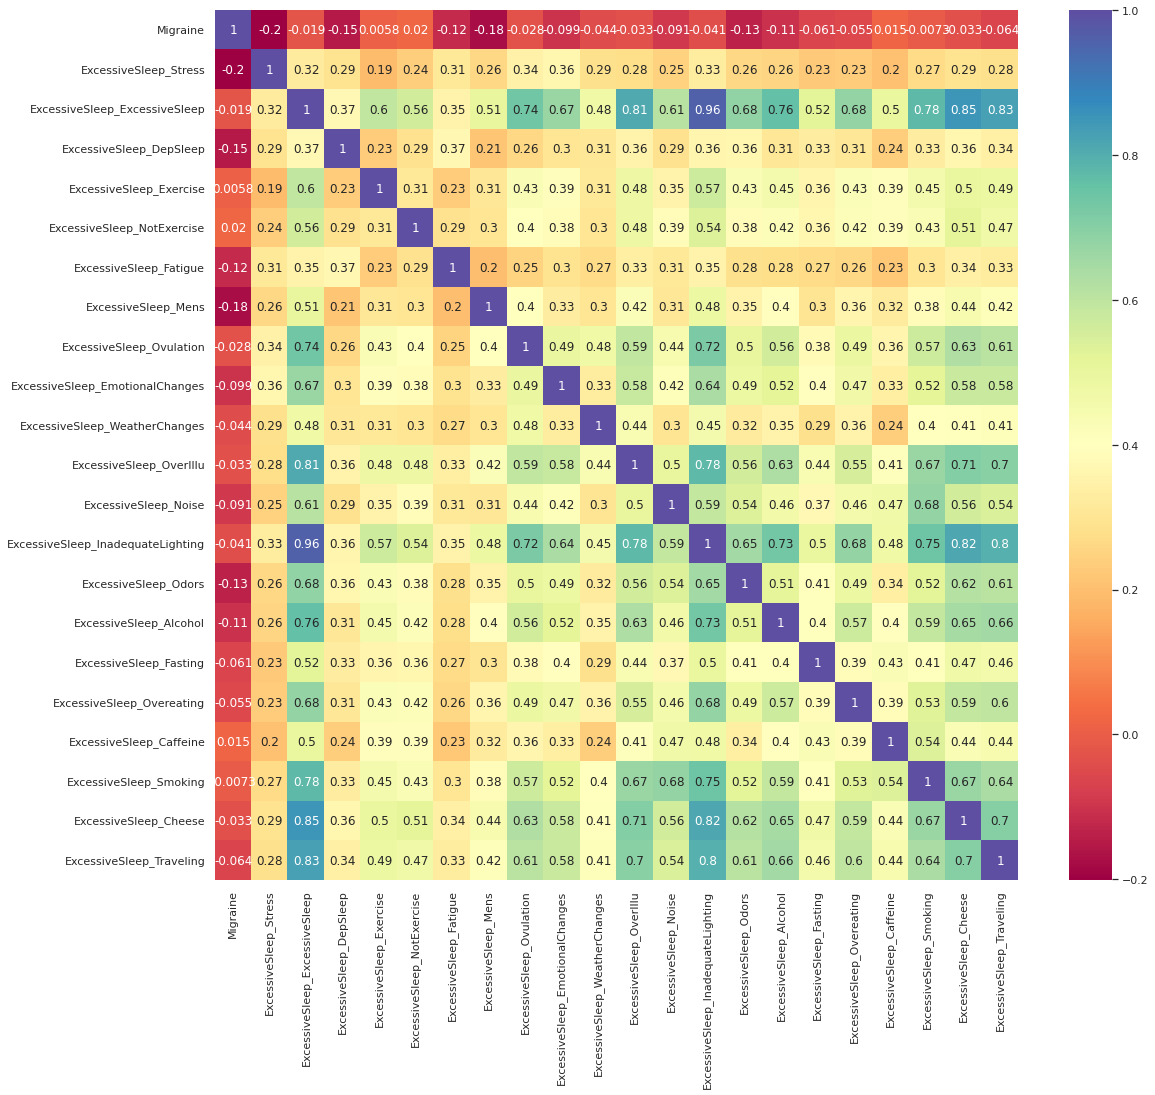

In [ ]:
#Merge ExcessiveSleep with other features
dataExcessiveSleep = pd.DataFrame()
# dataStress = dataS.drop(['Duration','Trigger','NumberOfTriggers','0ther triggers'],axis=1)
dataExcessiveSleep['Migraine'] = data['Migraine']
#  ExcessiveSleep and Stress
dataExcessiveSleep['ExcessiveSleep_Stress'] = (data['Stress'] == 0.0 )& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_Stress']= dataExcessiveSleep['ExcessiveSleep_Stress'].replace({False:0,True:1})
#  PreventiveDrug and ExcessiveSleep
dataExcessiveSleep['ExcessiveSleep_ExcessiveSleep'] = (data['ExcessiveSleep'] == 0.0 )& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_ExcessiveSleep']= dataExcessiveSleep['ExcessiveSleep_ExcessiveSleep'].replace({False:0,True:1})
#  ExcessiveSleep and SleepDeprivation
dataExcessiveSleep['ExcessiveSleep_DepSleep'] = (data['SleepDeprivation'] == 0.0 )& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_DepSleep']= dataExcessiveSleep['ExcessiveSleep_DepSleep'].replace({False:0,True:1})
# ExcessiveSleep and Exercise
dataExcessiveSleep['ExcessiveSleep_Exercise'] = (data['Exercise'] == 0.0)& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_Exercise']= dataExcessiveSleep['ExcessiveSleep_Exercise'].replace({False:0,True:1})
# ExcessiveSleep and NotExercise
dataExcessiveSleep['ExcessiveSleep_NotExercise'] = (data['NotExercise'] == 0.0 )& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_NotExercise']= dataExcessiveSleep['ExcessiveSleep_NotExercise'].replace({False:0,True:1})
# ExcessiveSleep and Fatigue
dataExcessiveSleep['ExcessiveSleep_Fatigue'] = (data['Fatigue'] == 0.0 )& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_Fatigue']= dataExcessiveSleep['ExcessiveSleep_Fatigue'].replace({False:0,True:1})
#  ExcessiveSleep and Menstruation
dataExcessiveSleep['ExcessiveSleep_Mens'] = (data['Menstruation'] == 0.0 )& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_Mens']= dataExcessiveSleep['ExcessiveSleep_Mens'].replace({False:0,True:1})
#  ExcessiveSleep and Ovulation
dataExcessiveSleep['ExcessiveSleep_Ovulation'] = (data['Ovulation'] == 0.0 )& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_Ovulation']= dataExcessiveSleep['ExcessiveSleep_Ovulation'].replace({False:0,True:1})
#  ExcessiveSleep and EmotionalChanges
dataExcessiveSleep['ExcessiveSleep_EmotionalChanges'] = (data['EmotionalChanges'] == 0.0 )& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_EmotionalChanges']= dataExcessiveSleep['ExcessiveSleep_EmotionalChanges'].replace({False:0,True:1})
#  ExcessiveSleep and WeatherChanges
dataExcessiveSleep['ExcessiveSleep_WeatherChanges'] = (data['WeatherChanges'] == 0.0 )& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_WeatherChanges']= dataExcessiveSleep['ExcessiveSleep_WeatherChanges'].replace({False:0,True:1})
# ExcessiveSleep and Overillumination
dataExcessiveSleep['ExcessiveSleep_OverIllu'] = (data['Overillumination'] == 0.0)& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_OverIllu']= dataExcessiveSleep['ExcessiveSleep_OverIllu'].replace({False:0,True:1})
#  ExcessiveSleep and Noise
dataExcessiveSleep['ExcessiveSleep_Noise'] = (data['Noise'] == 0.0 )& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_Noise']= dataExcessiveSleep['ExcessiveSleep_Noise'].replace({False:0,True:1})
#  ExcessiveSleep and InadequateLighting
dataExcessiveSleep['ExcessiveSleep_InadequateLighting'] = (data['InadequateLighting'] == 0.0 )& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_InadequateLighting']= dataExcessiveSleep['ExcessiveSleep_InadequateLighting'].replace({False:0,True:1})
#  ExcessiveSleep and Odors
dataExcessiveSleep['ExcessiveSleep_Odors'] = (data['Odors'] == 0.0 )& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_Odors']= dataExcessiveSleep['ExcessiveSleep_Odors'].replace({False:0,True:1})
#  ExcessiveSleep and Alcohol
dataExcessiveSleep['ExcessiveSleep_Alcohol'] = (data['Alcohol'] == 0.0 )& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_Alcohol']= dataExcessiveSleep['ExcessiveSleep_Alcohol'].replace({False:0,True:1})
#  ExcessiveSleep and Fasting
dataExcessiveSleep['ExcessiveSleep_Fasting'] = (data['Fasting'] == 0.0 )& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_Fasting']= dataExcessiveSleep['ExcessiveSleep_Fasting'].replace({False:0,True:1})
#  ExcessiveSleep and Overeating
dataExcessiveSleep['ExcessiveSleep_Overeating'] = (data['Overeating'] == 0.0 )& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_Overeating']= dataExcessiveSleep['ExcessiveSleep_Overeating'].replace({False:0,True:1})
#  ExcessiveSleep and Caffeine
dataExcessiveSleep['ExcessiveSleep_Caffeine'] = (data['Caffeine'] == 0.0 )& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_Caffeine']= dataExcessiveSleep['ExcessiveSleep_Caffeine'].replace({False:0,True:1})
#  ExcessiveSleep and Smoking
dataExcessiveSleep['ExcessiveSleep_Smoking'] = (data['Smoking'] == 0.0 )& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_Smoking']= dataExcessiveSleep['ExcessiveSleep_Smoking'].replace({False:0,True:1})
#  ExcessiveSleep and CheeseChocolateConsumption
dataExcessiveSleep['ExcessiveSleep_Cheese'] = (data['CheeseChocolateConsumption'] == 0.0 )& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_Cheese']= dataExcessiveSleep['ExcessiveSleep_Cheese'].replace({False:0,True:1})
#  ExcessiveSleep and Traveling
dataExcessiveSleep['ExcessiveSleep_Traveling'] = (data['Traveling'] == 0.0 )& (data['ExcessiveSleep'] == 0.0)
dataExcessiveSleep['ExcessiveSleep_Traveling']= dataExcessiveSleep['ExcessiveSleep_Traveling'].replace({False:0,True:1})


dataExcessiveSleep.insert(0, 'Migraine', dataExcessiveSleep.pop('Migraine'))
# correlation matrix with original columns
sns.set()
plt.figure(figsize=(18,16))
p=sns.heatmap(dataExcessiveSleep.corr(), annot=True,cmap ='Spectral')

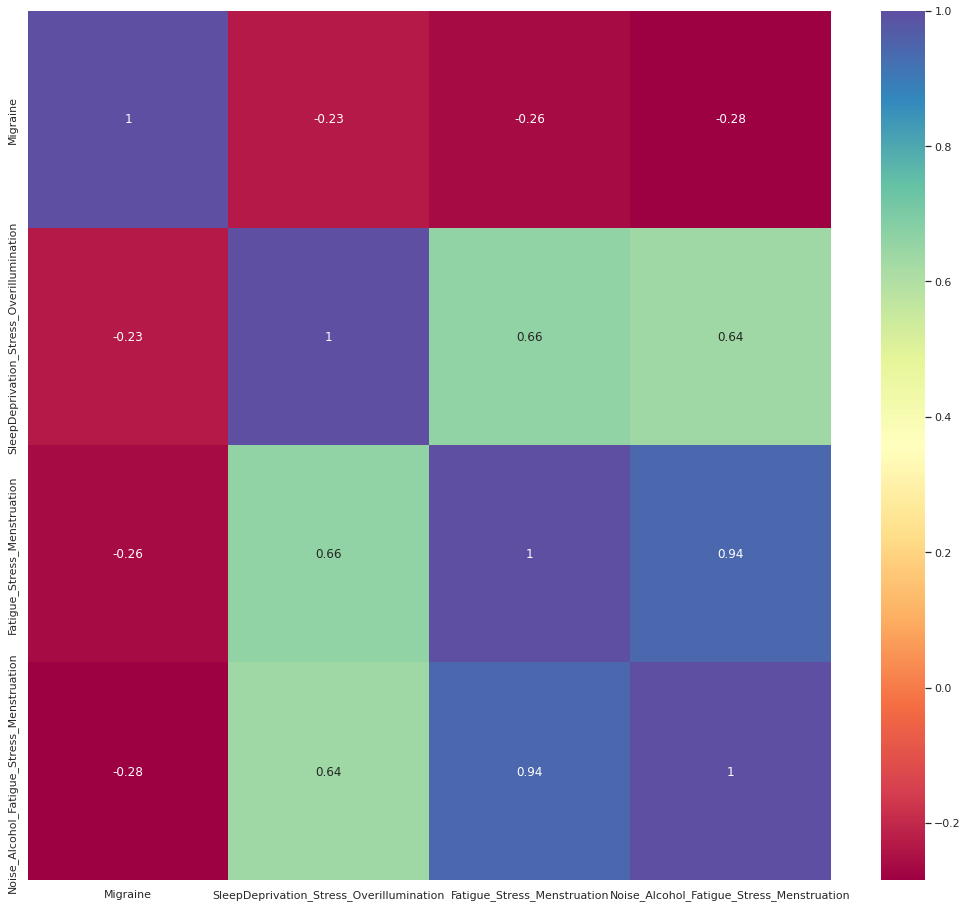

In [ ]:
MultiF = pd.DataFrame()
MultiF['Migraine'] = data['Migraine']
#  ExcessiveSleep and Traveling
MultiF['SleepDeprivation_Stress_Overillumination'] = (data['SleepDeprivation'] == 0.0 )& (data['Stress'] == 0.0)& (data['Overillumination'] == 0.0)
MultiF['SleepDeprivation_Stress_Overillumination']= MultiF['SleepDeprivation_Stress_Overillumination'].replace({False:0,True:1})

MultiF['Fatigue_Stress_Menstruation'] = (data['Fatigue'] == 0.0 )& (data['Stress'] == 0.0)& (data['Menstruation'] == 0.0)
MultiF['Fatigue_Stress_Menstruation']= MultiF['Fatigue_Stress_Menstruation'].replace({False:0,True:1})

MultiF['Noise_Alcohol_Fatigue_Stress_Menstruation'] = (data['Noise'] == 0.0 )&(data['Alcohol'] == 0.0 )&(data['Fatigue'] == 0.0 )& (data['Stress'] == 0.0)& (data['Menstruation'] == 0.0)
MultiF['Noise_Alcohol_Fatigue_Stress_Menstruation']= MultiF['Noise_Alcohol_Fatigue_Stress_Menstruation'].replace({False:0,True:1})

MultiF.insert(0, 'Migraine', MultiF.pop('Migraine'))
# correlation matrix with original columns
sns.set()
plt.figure(figsize=(18,16))
p=sns.heatmap(MultiF.corr(), annot=True,cmap ='Spectral')

In [ ]:
# balance data
bdata = data.copy(deep = True)
#Remove columns
bdata = bdata.drop(['Duration','Trigger','NumberOfTriggers','0ther triggers'],axis=1)
# Make a list of all column name
Features = bdata.columns.tolist()
# Separate data to feature and label datasets
X=bdata.drop(['Migraine'],axis=1)
X_names = X.columns.tolist()
y=bdata['Migraine']
y_names=['NoMigraine','Migraine',]

In [ ]:
#Over sampling to balance data
# check count of label
y_counter = Counter(y)
print(y_counter)
# fix imbalance dataset
over_sample = ADASYN()
X, y = over_sample.fit_resample(X,y)
# check count of label and we can see The numbers class=0 and class=1 are almost the same count.
y_counter = Counter(y)
print(y_counter)

Counter({0.0: 4208, 1.0: 332})
Counter({1.0: 4241, 0.0: 4208})


In [ ]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

In [ ]:
#### Logistic Regresstion ###
# Define the Logistic Regression model
logit = LogisticRegression()
# Train the model on the training dataset
logit.fit(X_train, y_train)
# Get the accuracy over the test data
score = logit.score(X_test, y_test)
print("Accuracy of Logistic Regression model:", round(score,4))

Accuracy of Logistic Regression model: 0.7781


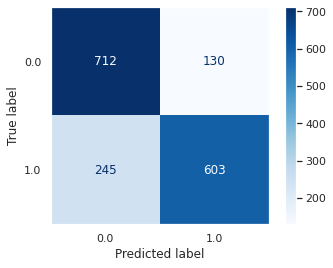

In [ ]:
plot_confusion_matrix(logit, X_test, y_test,cmap="Blues")
plt.grid(False)
plt.show()

In [ ]:
#### Random Forest ###

rd_st = 15
#train random forest model
forest = RandomForestClassifier(n_estimators=100,bootstrap=True,max_features='auto',criterion='gini',max_depth=None,random_state=rd_st,oob_score=True)
forest.fit(X_train,y_train)
#predict the result and print accuracy on training and test dataset
y_train_pred = forest.predict(X_train)
print("Accuracy on training set:",round(metrics.accuracy_score(y_train, y_train_pred),3))
y_test_pred = forest.predict(X_test)
print("Accuracy on test set:",round(metrics.accuracy_score(y_test, y_test_pred),3))

Accuracy on training set: 0.96
Accuracy on test set: 0.941


In [ ]:
# all model and hyper parameter
model_params = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params' : {
            'clf__n_estimators': [50,100,300,500,700,1000],
            'clf__random_state': [rd_st],
            'clf__criterion': ['gini', 'entropy', 'log_loss'],
            'clf__max_features': ["auto", "sqrt"],
            'clf__max_depth' : [3,5,7,9,15,20,None],
            'clf__min_samples_split' : [2,3, 5,7,9, 10,15],
            'clf__min_samples_leaf' : [1,4,8,10,20,30,50],
            'clf__bootstrap': [True, False],
            'clf__oob_score' : [True, False],

        }
    },

}

scores = []
# In training a machine learning model, the problem that we often face is the distribution of data.
# we can use standard_scaler,robust_scaler,min_max_scaler to fix this problem
list_scalar = []
list_scalar.append(StandardScaler())
list_scalar.append(RobustScaler())
list_scalar.append(MinMaxScaler())

name_scalar = []
for i in range(len(list_scalar)):
  for model_name, mp in model_params.items():
    print('scalar = ',list_scalar[i] ,'model =',mp['model'], 'params =', mp['params'])
    # we use pipeline to combine scalar and model
    pipe = Pipeline(steps=[('scaler', list_scalar[i]), ('clf', mp['model'])])
    name_scalar = list_scalar[i]
    # we use RandomizedSearchCV instead GridSearchCV because it is fast
    # we use pipeline and parameter
    random_search = RandomizedSearchCV(
      estimator = pipe,
      param_distributions= mp['params'],
      n_iter=100,
      cv=5,
    )
    random_search.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'name_scalar':name_scalar,
        'best_score': random_search.best_score_,
        'best_params': random_search.best_params_,
        'best_estimator':random_search.best_estimator_
    })
# show accuracy, best_parameter and best_estimator in each model


# compare all model, f1-score, name scalar, best_params, best_estimator in one data frame and sort by model and best_score
df_random_search_cv = pd.DataFrame(scores,columns=['model','best_score','name_scalar','best_params','best_estimator'])
df_random_search_cv = df_random_search_cv.sort_values(by=['model','best_score'],ascending=False)

df_random_search_cv


scalar =  StandardScaler() model = RandomForestClassifier() params = {'clf__n_estimators': [50, 100, 300, 500, 700, 1000], 'clf__random_state': [15], 'clf__criterion': ['gini', 'entropy', 'log_loss'], 'clf__max_features': ['auto', 'sqrt'], 'clf__max_depth': [3, 5, 7, 9, 15, 20, None], 'clf__min_samples_split': [2, 3, 5, 7, 9, 10, 15], 'clf__min_samples_leaf': [1, 4, 8, 10, 20, 30, 50], 'clf__bootstrap': [True, False], 'clf__oob_score': [True, False]}
scalar =  RobustScaler() model = RandomForestClassifier() params = {'clf__n_estimators': [50, 100, 300, 500, 700, 1000], 'clf__random_state': [15], 'clf__criterion': ['gini', 'entropy', 'log_loss'], 'clf__max_features': ['auto', 'sqrt'], 'clf__max_depth': [3, 5, 7, 9, 15, 20, None], 'clf__min_samples_split': [2, 3, 5, 7, 9, 10, 15], 'clf__min_samples_leaf': [1, 4, 8, 10, 20, 30, 50], 'clf__bootstrap': [True, False], 'clf__oob_score': [True, False]}
scalar =  MinMaxScaler() model = RandomForestClassifier() params = {'clf__n_estimators': [50

model  best_score       name_scalar  \
0  RandomForestClassifier    0.945555  StandardScaler()   
2  RandomForestClassifier    0.941265    MinMaxScaler()   
1  RandomForestClassifier    0.937713    RobustScaler()   

                                         best_params  \
0  {'clf__random_state': 15, 'clf__oob_score': Fa...   
2  {'clf__random_state': 15, 'clf__oob_score': Tr...   
1  {'clf__random_state': 15, 'clf__oob_score': Fa...   

                                      best_estimator  
0  (StandardScaler(), (DecisionTreeClassifier(cri...  
2  (MinMaxScaler(), (DecisionTreeClassifier(max_d...  
1  (RobustScaler(), (DecisionTreeClassifier(max_d...

In [ ]:
df_random_search_cv.to_csv('/content/drive/MyDrive/00 Study folder/03_Dissertation/Data/ParamResult.csv')

In [ ]:
forest = RandomForestClassifier(n_estimators=700,bootstrap=True,max_features='auto',criterion='gini',
                                max_depth=20,random_state=rd_st,oob_score=True,min_samples_split=7,min_samples_leaf=1)
forest.fit(X_train,y_train)
#predict the result and print accuracy on training and test dataset
y_train_pred = forest.predict(X_train)
print("Accuracy on training set:",round(metrics.accuracy_score(y_train, y_train_pred),3))
y_test_pred = forest.predict(X_test)
print("Accuracy on test set:",round(metrics.accuracy_score(y_test, y_test_pred),3))

Accuracy on training set: 0.955
Accuracy on test set: 0.937


In [ ]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

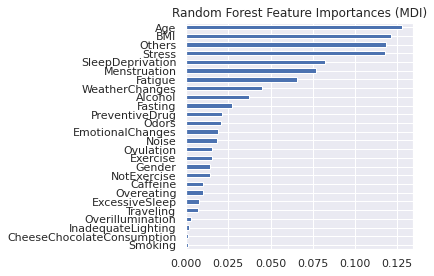

In [ ]:

# feature_names = rf[:-1].get_feature_names_out()

mdi_importances = pd.Series(importances, index=X_names).sort_values(ascending=True)
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

# forest_importances = pd.Series(importances, index=X_names)
# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()